In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances

df = train = pd.read_csv('train.csv')
df.describe()

ModuleNotFoundError: No module named 'sklearn'

In [295]:
def num_nans(df):
    return df.shape[0] - df.dropna().shape[0]
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


In [296]:
def drop_na(df):
    return df.dropna(axis = 1, thresh=len(df) - 200)
  
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [297]:
def to_numerical(df):
    return df['Sex'].apply({'male':0, 'female':1}.get)
df['Sex'] = to_numerical(df)
df.head()

/var/folders/yp/xcymb33n6xs1xkzy2rhry0f80000gn/T/ipykernel_34600/850260502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = to_numerical(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [303]:
def extract_names(df):
    df['First Name']= df["Name"].str.split(" ").str.get(2)
    df['Middle Name']= df["Name"].str.split(" ").str.get(3)
    df['Last Name']= df["Name"].str.split(", ").str.get(0)
    df['Title']= df["Name"].str.split(". ").str.get(1)
    df = df[['First Name','Middle Name','Last Name','Title']]
    return df

df[['First Name','Middle Name', 'Last Name','Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


In [310]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,29.699118,0,0,374910,8.0500,S,Charles,Joseph,Shorney,Mr
96,97,0,1,"Goldschmidt, Mr. George B",0,71.000000,0,0,PC 17754,34.6542,C,George,B,Goldschmidt,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.000000,0,1,PC 17759,63.3583,C,William,Bertram,Greenfield,Mr
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.000000,0,1,231919,23.0000,S,John,T,Doling,Mrs


<AxesSubplot:xlabel='Survived'>

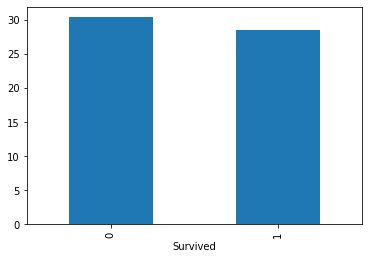

In [318]:
df.groupby('Survived').Age.mean().plot(kind='bar')
#the average age for not-survied people is around 30 and for survied people is around 28, which is slightly younger

<AxesSubplot:xlabel='Sex'>

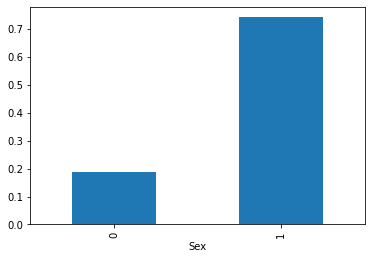

In [317]:
df.groupby('Sex').Survived.mean().plot(kind='bar')
#female takes a large proportion of the survied population.

<AxesSubplot:xlabel='Title'>

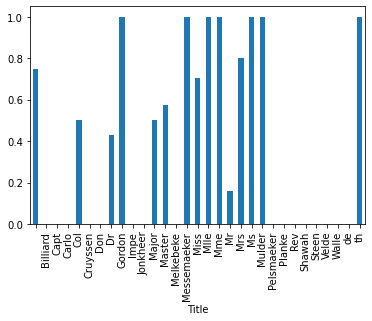

In [319]:
df.groupby('Title').Survived.mean().plot(kind='bar')
#there are some people with tittle that didn't survive. hard to tell the pattern

<AxesSubplot:xlabel='Survived'>

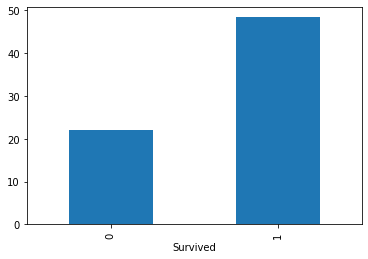

In [323]:
train.groupby('Survived').Fare.mean().plot(kind='bar')

<AxesSubplot:>

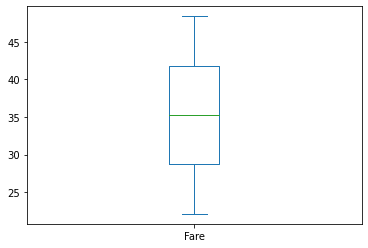

In [324]:
train.groupby('Survived').Fare.mean().plot(kind='box')
#the average fare is about 35~ and it is pretty evenly distributed

In [71]:
df['Fare']= df['Fare'].sub(df['Fare'].mean())/ df['Fare'].std()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,r,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,u,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,e,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,u,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,l,Henry,Allen,Mr


In [326]:

df = df.select_dtypes(include='number')


In [327]:

def N_most_similar(df, N):
    
    df = df.drop('PassengerId' ,axis = 1)
    print(df)
    
    distance_matrix = euclidean_distances(df.values)
    
    for i in range(len(df)):
        for j in range(len(df)):
            if i == j:
                distance_matrix[i][j] = float("inf")
    
    pairs = []
    
    for k in range(N):
        current_pair = np.unravel_index(np.argmin(distance_matrix, axis=None), distance_matrix.shape)
        pairs.append(current_pair)
        distance_matrix[current_pair[0], current_pair[1]] = np.max(distance_matrix)
        distance_matrix[current_pair[1], current_pair[0]] = np.max(distance_matrix)
        
        
    return pairs
    

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

ModuleNotFoundError: No module named 'sklearn'

In [289]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}
    
    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get('Python')
data_science = get('data_science')
data_analytics = get('data_analytics')
machine_learning =get('machine_learning')
deep_learning =get('deep_learning')


In [290]:
python = pd.json_normalize(python['items'] )
data_analytics = pd.json_normalize(data_analytics['items'] )
data_science = pd.json_normalize(data_science['items'] )
machine_learning = pd.json_normalize(machine_learning['items'] )
deep_learning = pd.json_normalize(deep_learning['items'] )

python.to_csv("CSV1.csv",index=False)
data_analytics.to_csv("CSV2.csv",index=False)
data_science.to_csv("CSV3.csv",index=False)
machine_learning.to_csv("CSV4.csv",index=False)
deep_learning.to_csv("CSV5.csv",index=False)



In [291]:
python= python.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
data_analytics= data_analytics.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
data_science= data_science.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
machine_learning= machine_learning.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
deep_learning= deep_learning.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})

In [292]:
python['Topic'] = 'Python'
data_science['Topic'] = 'data_science'
data_analytics['Topic'] = 'data_analytics'
machine_learning['Topic'] = 'machine_learning'
deep_learning['Topic'] = 'deep_learning'
df1 = pd.concat([python, data_analytics, data_science, machine_learning, deep_learning])
df1.to_csv("CSV.csv",index=False)
print(df1)

           kind            id         etag  \
0  books#volume  Chr1NDlUcI8C  JRxR+zJ7sOI   
1  books#volume  zjqzDAEACAAJ  QyZtCjI8T40   
2  books#volume  bTUFCAAAQBAJ  A0S6pmMmwY4   
3  books#volume  4pgQfXQvekcC  bWDLQxT/HSU   
4  books#volume  9MS9BQAAQBAJ  4AcBjmytFbg   
5  books#volume  aJQILlLxRmAC  CI3jkXjzmPM   
6  books#volume  s_qTvgEACAAJ  HODdngsGoes   
7  books#volume  aTkzEAAAQBAJ  mqUbdZlT1VM   
8  books#volume  RQ6xDwAAQBAJ  XzRHhFTsIUs   
9  books#volume  H9emM_LGFDEC  yIG5Xfeh+qI   
0  books#volume  TnkGEAAAQBAJ  JSvx+mDeiBQ   
1  books#volume  hz83EAAAQBAJ  pVsdjKf7MGw   
2  books#volume  _oVAEAAAQBAJ  CQH46fW22BE   
3  books#volume  1cnvCQAAQBAJ  pepZXjjgOhs   
4  books#volume  lKfQCwAAQBAJ  IBqs8bm+Z5U   
5  books#volume  2CnIzgEACAAJ  3JB80BQwuvM   
6  books#volume  n1nTBgAAQBAJ  ca74XVlHOb8   
7  books#volume  4UEwDwAAQBAJ  Q4e0ZFQrN0U   
8  books#volume  SxEazgEACAAJ  zGHPZQF04qc   
9  books#volume  qds7zgEACAAJ  wPiWNdaAtTY   
0  books#volume  hbJ5DwAAQBAJ  9bz

In [281]:
contain_values = df1[df1['Title'].str.contains('Data')]
print(contain_values)

           kind            id         etag  \
3  books#volume  1cnvCQAAQBAJ  9jPQmjmSlLU   
4  books#volume  lKfQCwAAQBAJ  APurlc61N6U   
8  books#volume  SxEazgEACAAJ  WN2wBXDFAxs   
1  books#volume  2_kmDwAAQBAJ  UaPXHtIg0X0   
2  books#volume  wAxIEAAAQBAJ  HpJHXnkOR+8   
3  books#volume  JYodCAAAQBAJ  Vtftx7V6/wI   
5  books#volume  M-dDDwAAQBAJ  BquaM369FP0   
8  books#volume  J94WBgAAQBAJ  4qK13YnOX3U   
9  books#volume  0U8oDwAAQBAJ  YvjyncpFEfY   
0  books#volume  DDL6DwAAQBAJ  jYX0ut2S3AY   
5  books#volume  hdDcDgAAQBAJ  VJqMTWf8+l0   
6  books#volume  j_2ODwAAQBAJ  HBR6MDE+Iko   
7  books#volume  cP1wDwAAQBAJ  wGaWIZ2/XDg   
8  books#volume  Ep-RDwAAQBAJ  fVv78f3DXqA   
1  books#volume  YBKSDwAAQBAJ  thp68nQPTI0   

                                            selfLink  \
3  https://www.googleapis.com/books/v1/volumes/1c...   
4  https://www.googleapis.com/books/v1/volumes/lK...   
8  https://www.googleapis.com/books/v1/volumes/Sx...   
1  https://www.googleapis.com/books/v1/

In [293]:
df1['Authors'] = df1['Authors'].str.get(0)
start_values  = df1[df1['Authors'].str.match('E')]
print(start_values)

           kind            id         etag  \
8  books#volume  J94WBgAAQBAJ  P0ASucUB2HE   

                                            selfLink  \
8  https://www.googleapis.com/books/v1/volumes/J9...   

                                 Title                 Authors  \
8  Data Science and Big Data Analytics  EMC Education Services   

  volumeInfo.publisher volumeInfo.publishedDate  \
8    John Wiley & Sons               2015-01-05   

                              volumeInfo.description  \
8  Data Science and Big Data Analytics is about h...   

                      volumeInfo.industryIdentifiers  ...  \
8  [{'type': 'ISBN_13', 'identifier': '9781118876...  ...   

   volumeInfo.panelizationSummary.containsImageBubbles  \
8                                              False     

   saleInfo.listPrice.amount  saleInfo.listPrice.currencyCode  \
8                       48.0                              USD   

  saleInfo.retailPrice.amount saleInfo.retailPrice.currencyCode  \
8      